<a href="https://colab.research.google.com/github/SrivenkateswaraRao/Research-Project/blob/master/Pest_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import os
from os import listdir
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import files
files.upload() 

In [1]:
import CreatePestImageData as Imagedataset
import SupportingFunctions as support

In [ ]:
support.DownLoadFiles('1aXb25Wp9sG7mL6AQgYY9ElrGcERi95JU',drive)

In [8]:
support.Unzip('/content/GREENPATROL_DB_V1.0.zip','/content/Pests/Images')

In [9]:
support.fileCount('/content/Pests/Images')

2000


In [4]:
dataSet = Imagedataset.createImageDataset()

In [ ]:
class_object = {0 : 'egg_wf' ,
                1 : 'egg_bt', 2 : 'egg_ta', 3 : 'wf', 4 : 'bt', 5 : 'ta', 6 : 'ta_maps', 7 : 'ta_larvae', 8 : 'ta_maps+larvae', 9 : 'tomato'}

In [2]:
class_object = {0 : 'egg_wf' ,
                1 : 'egg_bt', 2 : 'wf', 3 : 'bt', 4 : 'tomato'}

In [5]:
dataSet.prepare_dataset('/content/Pests/Labels' , class_object , 32,  '/content/Pests/Images/',  test_size=5000 )

Streaming output truncated to the last 5000 lines.
Image : /mendelu_pictures/pictures/2018-07-04 IMAGING JAI CMOS/1_2_2_6_1_1_20180704-093307.jpg added to dataset with class name "egg_bt".
Image : /mendelu_pictures/pictures/2018-07-04 IMAGING JAI CMOS/1_2_2_6_1_1_20180704-093307.jpg added to dataset with class name "egg_bt".
Image : /mendelu_pictures/pictures/2018-07-04 IMAGING JAI CMOS/1_2_2_6_1_1_20180704-093307.jpg added to dataset with class name "egg_bt".
Image : /mendelu_pictures/pictures/2018-07-04 IMAGING JAI CMOS/1_2_2_6_1_1_20180704-093307.jpg added to dataset with class name "egg_bt".
Image : /mendelu_pictures/pictures/2018-07-04 IMAGING JAI CMOS/1_2_2_6_1_1_20180704-093307.jpg added to dataset with class name "egg_bt".
Image : /mendelu_pictures/pictures/2018-07-04 IMAGING JAI CMOS/1_2_2_6_1_1_20180704-093307.jpg added to dataset with class name "egg_bt".
Image : /mendelu_pictures/pictures/2018-07-04 IMAGING JAI CMOS/1_2_2_6_1_1_20180704-093307.jpg added to dataset with clas

In [47]:
(trainY , trainX) , (testY , testX ) = (dataSet.trainY , dataSet.trainX ) , (dataSet.testY , dataSet.testX )


In [36]:

# define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu, input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    #  10-node softmax layer, with each node representing a class of clothing.
    tf.keras.layers.Dense(5,  activation=tf.nn.softmax)
])
 
# compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [34]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(16474, 32, 32, 3)
(16474,)
(5000, 32, 32, 3)
(5000,)


In [22]:
filepath="/content/drive/My Drive/Models/CNN3/weights-{epoch:02d}-{accuracy:.3f}.hdf5"
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath, monitor='accuracy',
                               verbose=1, mode='max',save_best_only=True)

callbacks_list = [checkpoint]

In [37]:

from keras.utils import to_categorical
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [39]:
print(trainY.shape)

(16474, 5)


In [40]:
model.fit(trainX,trainY,verbose=1,epochs=25, validation_data=(testX,testY),callbacks=[checkpoint])

Epoch 1/25
513/515 [============================>.] - ETA: 0s - loss: 1.8223 - accuracy: 0.6185
Epoch 00001: accuracy improved from -inf to 0.61831, saving model to /content/drive/My Drive/Models/CNN3/weights-01-0.618.hdf5
515/515 [==============================] - 10s 19ms/step - loss: 1.8197 - accuracy: 0.6183 - val_loss: 0.9203 - val_accuracy: 0.6348
Epoch 2/25
514/515 [============================>.] - ETA: 0s - loss: 0.8754 - accuracy: 0.6477
Epoch 00002: accuracy improved from 0.61831 to 0.64726, saving model to /content/drive/My Drive/Models/CNN3/weights-02-0.647.hdf5
515/515 [==============================] - 10s 20ms/step - loss: 0.8757 - accuracy: 0.6473 - val_loss: 0.8680 - val_accuracy: 0.6498
Epoch 3/25
514/515 [============================>.] - ETA: 0s - loss: 0.8342 - accuracy: 0.6616
Epoch 00003: accuracy improved from 0.64726 to 0.66183, saving model to /content/drive/My Drive/Models/CNN3/weights-03-0.662.hdf5
515/515 [==============================] - 10s 19ms/step - 

In [41]:

from tensorflow.keras.models import load_model
model_retrain = load_model("/content/drive/My Drive/Models/CNN3/weights-24-0.871.hdf5")

In [42]:
(augTrainX,augTrainY) = support.PrepareAugmentedData(trainX,trainY)


In [44]:
model_retrain.fit(augTrainX,augTrainY,verbose=1,epochs=25, validation_data=(testX,testY),callbacks=[checkpoint])

Epoch 1/25
1030/1030 [==============================] - ETA: 0s - loss: 0.8619 - accuracy: 0.6762
Epoch 00001: accuracy did not improve from 0.87064
1030/1030 [==============================] - 20s 20ms/step - loss: 0.8619 - accuracy: 0.6762 - val_loss: 0.9346 - val_accuracy: 0.6436
Epoch 2/25
1030/1030 [==============================] - ETA: 0s - loss: 0.7188 - accuracy: 0.7149
Epoch 00002: accuracy did not improve from 0.87064
1030/1030 [==============================] - 20s 19ms/step - loss: 0.7188 - accuracy: 0.7149 - val_loss: 0.9705 - val_accuracy: 0.6574
Epoch 3/25
1030/1030 [==============================] - ETA: 0s - loss: 0.6586 - accuracy: 0.7362
Epoch 00003: accuracy did not improve from 0.87064
1030/1030 [==============================] - 20s 19ms/step - loss: 0.6586 - accuracy: 0.7362 - val_loss: 0.9603 - val_accuracy: 0.6612
Epoch 4/25
1030/1030 [==============================] - ETA: 0s - loss: 0.6030 - accuracy: 0.7587
Epoch 00004: accuracy did not improve from 0.87064

In [49]:
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
   
  plt.imshow(img[...,0], cmap=plt.cm.binary)
 
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
   
  plt.xlabel("{} {:2.0f}% ({})".format(class_object[predicted_label],
                                100*np.max(predictions_array),
                                class_object[true_label]),
                                color=color)

In [ ]:
num_rows = 3
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*num_cols, 2*num_rows))
test_images = testX[:num_images]
predictions = model_with_conv.predict(testX)
for i in range(num_images):    
    plt.subplot(num_rows, num_cols, i+1)   
    plot_image(i, predictions, testY, testX)    
 
plt.tight_layout()
plt.show()

In [51]:
acc = model_retrain.history.history['accuracy']
val_accuracy = model_retrain.history.history['val_accuracy']
loss  =  model_retrain.history.history['loss']
val_loss = model_retrain.history.history['val_loss']

In [52]:
def GenerateGraphs(acc, val_acc, loss, val_loss):
     epochs = range(len(acc))
     plt.plot(epochs, acc, 'bo', label='Training accuracy')
     plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
     plt.title('Training and validation accuracy')
     plt.figure()
     plt.plot(epochs, loss, 'bo', label='Training Loss')
     plt.plot(epochs, val_loss, 'b', label='Validation Loss')
     plt.title('Training and validation loss')
     plt.legend()
     plt.show()

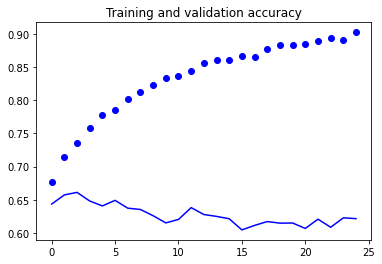

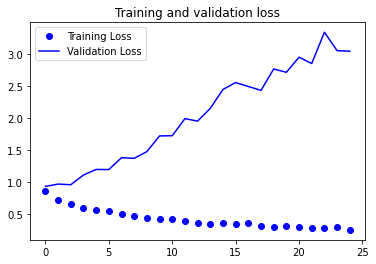

In [53]:
GenerateGraphs(acc,val_accuracy,loss,val_loss)

In [54]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
y_pred1 = model_with_conv.predict(testX)
y_pred = np.argmax(y_pred1, axis=1)

In [56]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [55]:
def PrintMetrics(testX, testY, model):
    yhat_probs = model.predict(testX, verbose=0)
    yhat_classes = model.predict_classes(testX, verbose=0)
    accuracy = accuracy_score(testY, yhat_classes)
    precision = precision_score(testY, yhat_classes, average="macro")
    print('Accuracy: %f' % accuracy)
    print('Precision: %f' % precision)
    recall = recall_score(testY, yhat_classes,average="macro")
    print('Recall: %f' % recall)
    f1 = f1_score(testY, yhat_classes,average="macro")
    print('F1 score: %f' % f1)
    kappa = cohen_kappa_score(testY, yhat_classes)
    print('Cohens kappa: %f' % kappa)

In [57]:
PrintMetrics(testX, testY, model)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Accuracy: 0.653400
Precision: 0.631963
Recall: 0.452220
F1 score: 0.474381
Cohens kappa: 0.422404
